In [67]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from scipy import stats

# Set visualization style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Suppress font warnings for emojis
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='IPython')
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('data/token_datasets.csv')

In [69]:
print(f"\n Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")


 Dataset Shape: 57 rows × 154 columns


In [70]:
df.describe()

,input_signal_data_result_overlap_count,input_signal_data_result_overlap_percentage,input_signal_data_result_concentration,input_signal_data_result_weighted_concentration,input_signal_data_result_total_winner_wallets,input_signal_data_result_skip_reason,input_security_probation_reason,input_rugcheck_top1_holder_pct,input_rugcheck_holder_count,input_rugcheck_creator_balance,...,time_since_pair_creation_minutes,time_since_pair_creation_hours,price_velocity,price_impact_score,authority_risk_score,pump_dump_risk_score,sustainability_score,average_holding_size,primary_market_liquidity_pct,liquidity_fragmentation_index
count,57.000000,57.000000,57.000000,57.000000,57.000000,0.0,0.0,57.000000,57.000000,57.0,...,2.000000,2.000000,57.000000,57.000000,57.0,57.000000,57.000000,2.000000e+00,2.0,2.0
mean,30.438596,26.648246,0.277544,1.047719,11278.087719,NaN,NaN,17.992782,1440.473684,0.0,...,1512.291667,25.204861,-0.081462,0.077519,0.0,11.298246,82.105263,4.917347e+11,100.0,0.0
std,36.735064,19.249242,0.348560,0.722115,1170.602215,NaN,NaN,8.402276,915.504371,0.0,...,5.338656,0.088978,0.474969,0.423841,0.0,9.567364,4.113064,4.153279e+11,0.0,0.0
min,7.000000,6.610000,0.060000,0.040000,9233.000000,NaN,NaN,5.217916,139.000000,0.0,...,1508.516667,25.141944,-3.377917,0.000000,0.0,0.000000,70.000000,1.980536e+11,100.0,0.0
25%,10.000000,16.130000,0.100000,0.120000,10347.000000,NaN,NaN,11.385060,780.000000,0.0,...,1510.404167,25.173403,0.000000,0.000000,0.0,8.000000,80.000000,3.448941e+11,100.0,0.0
50%,15.000000,20.430000,0.140000,1.330000,10347.000000,NaN,NaN,16.445349,1326.000000,0.0,...,1512.291667,25.204861,0.000000,0.000000,0.0,8.000000,85.000000,4.917347e+11,100.0,0.0
75%,25.000000,23.580000,0.240000,1.450000,12658.000000,NaN,NaN,23.975800,1676.000000,0.0,...,1514.179167,25.236319,0.000000,0.000000,0.0,15.000000,85.000000,6.385753e+11,100.0,0.0
max,138.000000,100.000000,1.330000,2.320000,12874.000000,NaN,NaN,34.488060,5049.000000,0.0,...,1516.066667,25.267778,0.000000,2.775222,0.0,45.000000,85.000000,7.854159e+11,100.0,0.0


In [71]:
df.isnull().sum()

snapshot_id                       0
generated_at_utc                  0
input_signal_data_ts              0
input_signal_data_check_type      0
input_signal_data_security        0
                                 ..
is_last_day_of_week               0
average_holding_size             55
primary_market_liquidity_pct     55
liquidity_fragmentation_index    55
date                              0
Length: 154, dtype: int64

In [72]:

# num of duplicate rows
df.duplicated().sum()

np.int64(0)

In [73]:
df['label_status'].value_counts()


label_status
loss    29
win     28
Name: count, dtype: int64

In [74]:
numerical_cols = [
    'price_velocity', 'price_impact_score',	'pump_dump_risk_score', 'sustainability_score',	'average_holding_size',	
    'primary_market_liquidity_pct', 'liquidity_fragmentation_index', 'rugcheck_score_normalized', 'risk_flag_count',	
    'number_of_markets', 'total_lp_providers', 'top_3_holders_pct',	'total_insider_networks', 'largest_insider_network_size',
    'total_insider_token_amount', 'total_insider_active_accounts', 'transfer_network_count', 'trade_network_count',	
    'graph_insiders_detected', 'token_supply', 'token_decimals', 'overlap_quality_score', 'winner_wallet_density',	
    'smart_money_concentration_ratio', 'insider_token_percentage', 'liquidity_per_holder', 'liquidity_to_mcap_ratio',	
    'volume_to_liquidity_ratio', 'turnover_ratio', 'whale_concentration_score', 'non_amm_top1_holder_pct', 
    'time_since_pair_creation_hours', 'input_signal_data_result_overlap_count',	'input_signal_data_result_overlap_percentage',	
    'input_signal_data_result_concentration', 'input_signal_data_result_weighted_concentration', 'input_signal_data_result_total_winner_wallets',	
    'input_rugcheck_top1_holder_pct', 'input_rugcheck_holder_count', 'input_rugcheck_transfer_fee_pct',	'input_rugcheck_lp_locked_pct',	
    'input_rugcheck_total_liquidity_usd', 'time_of_day_utc', 'day_of_week_utc', 'is_weekend_utc', 'is_public_holiday_any', 
    'creator_balance_pct', 'top_10_holders_pct', 'label_token_age_hours', 'label_tracking_duration_hours'
]

In [75]:
# pick only columns that actually exist in df (avoids KeyError if list has a typo)
num_cols_in_df = [c for c in numerical_cols if c in df.columns]

# fill NaNs with 0 for those columns
df[num_cols_in_df] = df[num_cols_in_df].fillna(0)

In [76]:
categorical_cols = [
    'suspicious_concentration', 'signal_source', 'grade', 'is_weekend_utc', 'is_public_holiday_any', 'is_rugged',	
    'has_mint_authority', 'has_freeze_authority', 'is_lp_locked_95_plus', 'has_critical_risk', 'has_warning_risk',	
    'has_pump_fun_market', 'has_meteora_market', 'has_raydium_market', 'has_transfer_network', 'launchpad_platform',	
    'is_launch_hour_1',	'is_launch_day_1', 'creator_balance_high_risk',	'creator_dumped', 'hour_category', 
    'is_crypto_prime_time', 'is_first_day_of_week', 'is_last_day_of_week'
]

In [77]:
for col in categorical_cols:
    print(f"\n{col}:")
    print("-" * 60)
    value_counts = df[col].value_counts()
    value_pcts = df[col].value_counts(normalize=True) * 100
    
    for category, count in value_counts.items():
        pct = value_pcts[category]
        print(f"   {category:30} | Count: {count:4} | Percentage: {pct:5.1f}%")

# Check relationship with target

for col in categorical_cols:
    print(f"\n{col}:")
    print("-" * 60)
    crosstab = pd.crosstab(df[col], df['label_status'], normalize='index') * 100
    print(crosstab.round(1))


suspicious_concentration:
------------------------------------------------------------
                                0 | Count:   57 | Percentage: 100.0%

signal_source:
------------------------------------------------------------
   alpha                          | Count:   57 | Percentage: 100.0%

grade:
------------------------------------------------------------
   LOW                            | Count:   34 | Percentage:  59.6%
   MEDIUM                         | Count:   15 | Percentage:  26.3%
   CRITICAL                       | Count:    8 | Percentage:  14.0%

is_weekend_utc:
------------------------------------------------------------
                                0 | Count:   48 | Percentage:  84.2%
                                1 | Count:    9 | Percentage:  15.8%

is_public_holiday_any:
------------------------------------------------------------
                                0 | Count:   55 | Percentage:  96.5%
                                1 | Count:    2 | P

In [78]:
correlation_matrix = df[num_cols_in_df].corr()



 Correlation Matrix:
                                                 price_velocity  \
price_velocity                                            1.000   
price_impact_score                                       -0.984   
pump_dump_risk_score                                     -0.522   
sustainability_score                                      0.514   
average_holding_size                                     -0.557   
primary_market_liquidity_pct                             -0.907   
liquidity_fragmentation_index                               NaN   
rugcheck_score_normalized                                -0.907   
risk_flag_count                                             NaN   
number_of_markets                                        -0.983   
total_lp_providers                                          NaN   
top_3_holders_pct                                        -0.828   
total_insider_networks                                   -0.994   
largest_insider_network_size            

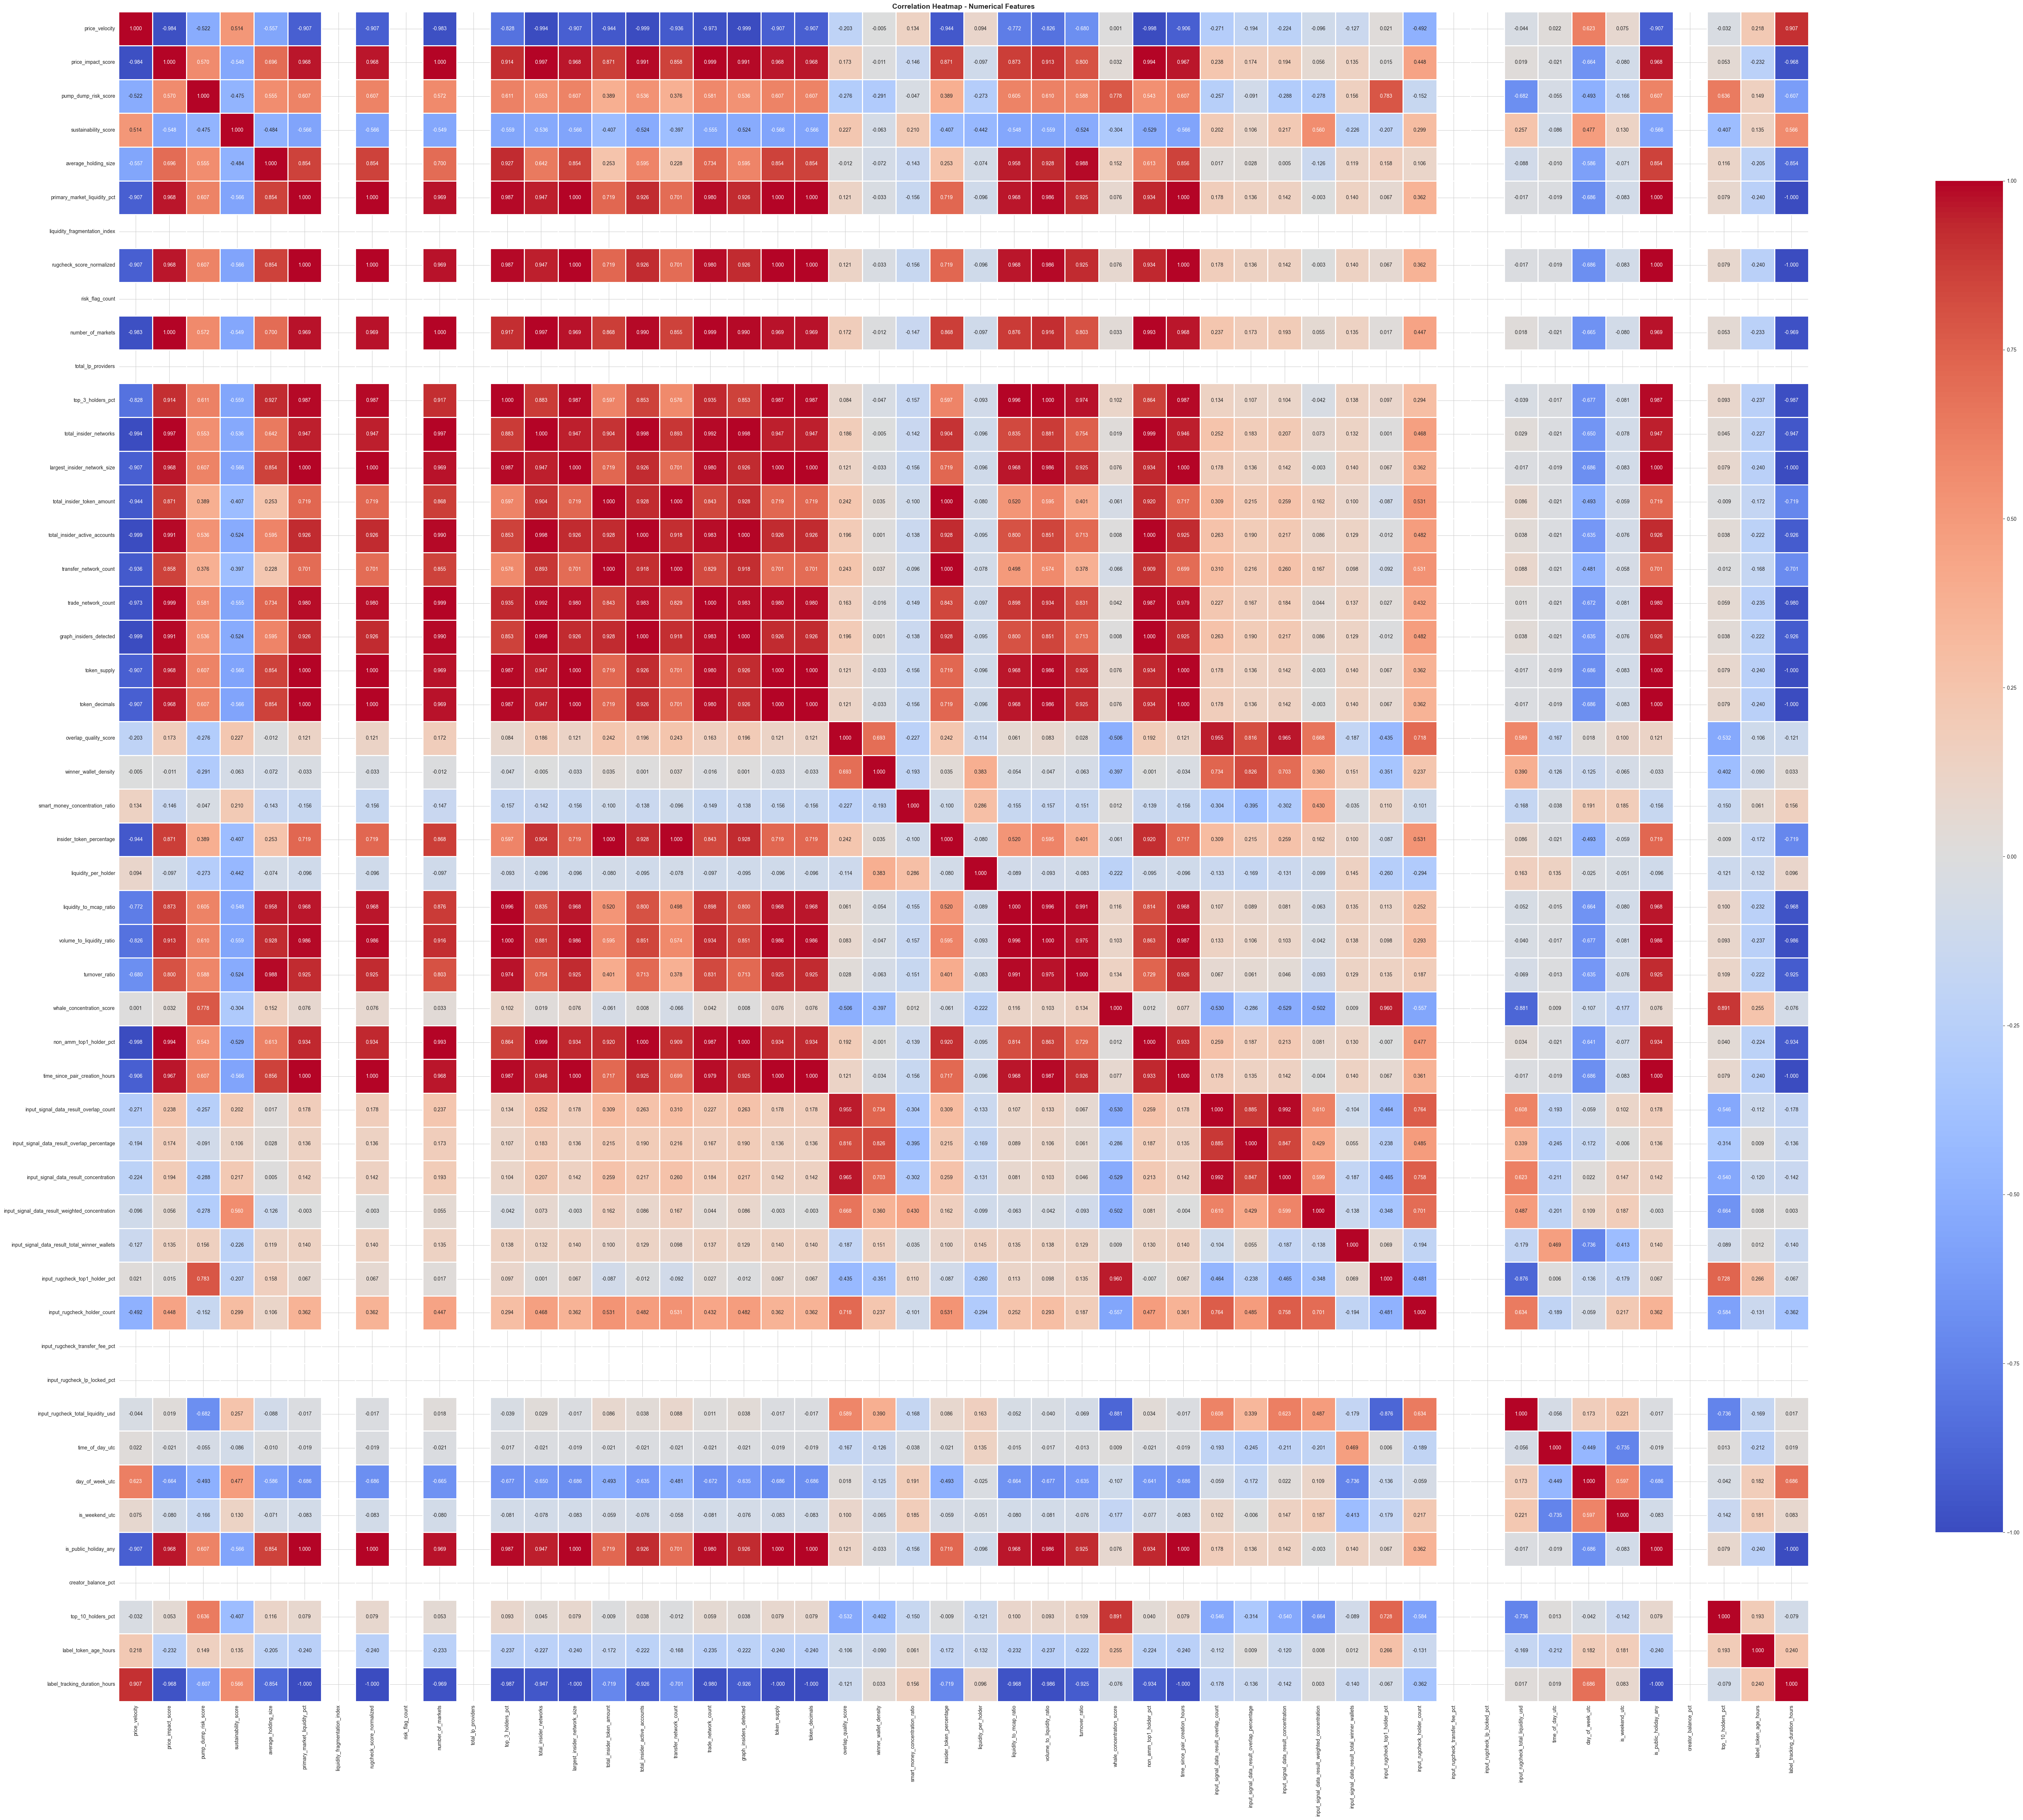

In [79]:
# Display correlation values
print("\n Correlation Matrix:")
print(correlation_matrix.round(3))

# Visualize with heatmap
plt.figure(figsize=(70, 50))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [80]:
high_corr_found = False
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_found = True
            print(f"{correlation_matrix.columns[i]:20} <-> {correlation_matrix.columns[j]:20} | r = {corr_value:.3f}")

if not high_corr_found:
    print("No high correlations found - features are relatively independent!")

print("\n Interpretation:")
print("   - |r| > 0.9: Very strong correlation (potential multicollinearity)")
print("   - |r| > 0.7: Strong correlation (consider removing one)")
print("   - |r| < 0.7: Acceptable correlation")

price_velocity       <-> price_impact_score   | r = -0.984
price_velocity       <-> primary_market_liquidity_pct | r = -0.907
price_velocity       <-> rugcheck_score_normalized | r = -0.907
price_velocity       <-> number_of_markets    | r = -0.983
price_velocity       <-> top_3_holders_pct    | r = -0.828
price_velocity       <-> total_insider_networks | r = -0.994
price_velocity       <-> largest_insider_network_size | r = -0.907
price_velocity       <-> total_insider_token_amount | r = -0.944
price_velocity       <-> total_insider_active_accounts | r = -0.999
price_velocity       <-> transfer_network_count | r = -0.936
price_velocity       <-> trade_network_count  | r = -0.973
price_velocity       <-> graph_insiders_detected | r = -0.999
price_velocity       <-> token_supply         | r = -0.907
price_velocity       <-> token_decimals       | r = -0.907
price_velocity       <-> insider_token_percentage | r = -0.944
price_velocity       <-> liquidity_to_mcap_ratio | r = -0.772
price_

In [81]:
# Statistical comparison
for col in numerical_cols:
    loss = df[df['label_status'] == 'loss'][col]
    win = df[df['label_status'] == 'win'][col]
    
    print(f"\n{col}:")
    print("-" * 60)
    print(f"{'':20} | Loss | Win | Difference")
    print("-" * 60)
    print(f"{'Mean':20} | {loss.mean():11.2f} | {win.mean():12.2f} | {win.mean() - loss.mean():+10.2f}")
    print(f"{'Median':20} | {loss.median():11.2f} | {win.median():12.2f} | {win.median() - loss.median():+10.2f}")
    print(f"{'Std Dev':20} | {loss.std():11.2f} | {win.std():12.2f} | {win.std() - loss.std():+10.2f}")
    print(f"{'Min':20} | {loss.min():11.2f} | {win.min():12.2f} |")
    print(f"{'Max':20} | {loss.max():11.2f} | {win.max():12.2f} |")


price_velocity:
------------------------------------------------------------
                     | Loss | Win | Difference
------------------------------------------------------------
Mean                 |       -0.04 |        -0.12 |      -0.08
Median               |        0.00 |         0.00 |      +0.00
Std Dev              |        0.23 |         0.64 |      +0.40
Min                  |       -1.27 |        -3.38 |
Max                  |        0.00 |         0.00 |

price_impact_score:
------------------------------------------------------------
                     | Loss | Win | Difference
------------------------------------------------------------
Mean                 |        0.06 |         0.10 |      +0.04
Median               |        0.00 |         0.00 |      +0.00
Std Dev              |        0.31 |         0.52 |      +0.22
Min                  |        0.00 |         0.00 |
Max                  |        1.64 |         2.78 |

pump_dump_risk_score:
---------------

In [82]:
# T-test for statistical significance
from scipy import stats

for col in numerical_cols:
    bad_traders = df[df['label_status'] == 'loss'][col]
    good_traders = df[df['label_status'] == 'win'][col]
    
    t_stat, p_value = stats.ttest_ind(bad_traders, good_traders)
    
    print(f"\n{col}:")
    print(f"   T-statistic: {t_stat:.4f}")
    print(f"   P-value: {p_value:.6f}")
    
    if p_value < 0.001:
        print(f"   Result: HIGHLY SIGNIFICANT (p < 0.001) - Strong predictor!")
    elif p_value < 0.05:
        print(f"   Result: SIGNIFICANT (p < 0.05) - Good predictor!")
    else:
        print(f"   Result: NOT SIGNIFICANT (p >= 0.05) - Weak predictor")

print("\n Interpretation:")
print("   - p < 0.001: Feature differs significantly between Win/Loss")
print("   - Lower p-value = stronger evidence of difference")


price_velocity:
   T-statistic: 0.6085
   P-value: 0.545382
   Result: NOT SIGNIFICANT (p >= 0.05) - Weak predictor

price_impact_score:
   T-statistic: -0.3751
   P-value: 0.709033
   Result: NOT SIGNIFICANT (p >= 0.05) - Weak predictor

pump_dump_risk_score:
   T-statistic: 3.1750
   P-value: 0.002456
   Result: SIGNIFICANT (p < 0.05) - Good predictor!

sustainability_score:
   T-statistic: -0.3869
   P-value: 0.700312
   Result: NOT SIGNIFICANT (p >= 0.05) - Weak predictor

average_holding_size:
   T-statistic: 0.7038
   P-value: 0.484557
   Result: NOT SIGNIFICANT (p >= 0.05) - Weak predictor

primary_market_liquidity_pct:
   T-statistic: -0.0248
   P-value: 0.980293
   Result: NOT SIGNIFICANT (p >= 0.05) - Weak predictor

liquidity_fragmentation_index:
   T-statistic: nan
   P-value: nan
   Result: NOT SIGNIFICANT (p >= 0.05) - Weak predictor

rugcheck_score_normalized:
   T-statistic: -0.0248
   P-value: 0.980293
   Result: NOT SIGNIFICANT (p >= 0.05) - Weak predictor

risk_flag

In [83]:
from sklearn.preprocessing import LabelEncoder

print("="*60)
print("🏷️ LABEL ENCODING CATEGORICAL FEATURES")
print("="*60)

# Create a copy of the dataframe
df_encoded = df.copy()

# Create label encoders
label_encoders = {}

# ============================================
# 1. ENCODE trader_activity_status
# ============================================
print(f"\n📊 Encoding: trader_activity_status")
print("-" * 60)

le_activity = LabelEncoder()

le_target = LabelEncoder()
df_encoded['target_encoded'] = le_target.fit_transform(df_encoded['label_status'])
label_encoders['target'] = le_target

# prepare list of categorical columns that exist in the dataframe
cat_cols_in_df = [c for c in categorical_cols if c in df.columns]
print(f"Found {len(cat_cols_in_df)} categorical columns to encode.")

for col in cat_cols_in_df:
    print(f"\n📊 Encoding: {col}")
    print("-" * 60)
    le = LabelEncoder()
    # handle NaNs and cast to str to avoid issues with mixed types
    series = df_encoded[col].fillna('MISSING').astype(str)
    try:
        df_encoded[col] = le.fit_transform(series)
        label_encoders[col] = le
        print(f"  Encoded {col} → {len(le.classes_)} classes")
    except Exception as e:
        print(f"  Failed to encode {col}: {e}")


🏷️ LABEL ENCODING CATEGORICAL FEATURES

📊 Encoding: trader_activity_status
------------------------------------------------------------
Found 24 categorical columns to encode.

📊 Encoding: suspicious_concentration
------------------------------------------------------------
  Encoded suspicious_concentration → 1 classes

📊 Encoding: signal_source
------------------------------------------------------------
  Encoded signal_source → 1 classes

📊 Encoding: grade
------------------------------------------------------------
  Encoded grade → 3 classes

📊 Encoding: is_weekend_utc
------------------------------------------------------------
  Encoded is_weekend_utc → 2 classes

📊 Encoding: is_public_holiday_any
------------------------------------------------------------
  Encoded is_public_holiday_any → 2 classes

📊 Encoding: is_rugged
------------------------------------------------------------
  Encoded is_rugged → 1 classes

📊 Encoding: has_mint_authority
--------------------------------

In [84]:
# Combine numerical columns with encoded categorical columns
encoded_categorical_cols = [c for c in cat_cols_in_df if c in df_encoded.columns]
all_features = num_cols_in_df + encoded_categorical_cols

print(f"✅ Total features: {len(all_features)}")
print(f"   - Numerical features: {len(num_cols_in_df)}")
print(f"   - Encoded categorical features: {len(encoded_categorical_cols)}")
print(f"\nAll features:\n{all_features}")

✅ Total features: 74
   - Numerical features: 50
   - Encoded categorical features: 24

All features:
['price_velocity', 'price_impact_score', 'pump_dump_risk_score', 'sustainability_score', 'average_holding_size', 'primary_market_liquidity_pct', 'liquidity_fragmentation_index', 'rugcheck_score_normalized', 'risk_flag_count', 'number_of_markets', 'total_lp_providers', 'top_3_holders_pct', 'total_insider_networks', 'largest_insider_network_size', 'total_insider_token_amount', 'total_insider_active_accounts', 'transfer_network_count', 'trade_network_count', 'graph_insiders_detected', 'token_supply', 'token_decimals', 'overlap_quality_score', 'winner_wallet_density', 'smart_money_concentration_ratio', 'insider_token_percentage', 'liquidity_per_holder', 'liquidity_to_mcap_ratio', 'volume_to_liquidity_ratio', 'turnover_ratio', 'whale_concentration_score', 'non_amm_top1_holder_pct', 'time_since_pair_creation_hours', 'input_signal_data_result_overlap_count', 'input_signal_data_result_overlap_

🔥 CORRELATION ANALYSIS - ALL FEATURES


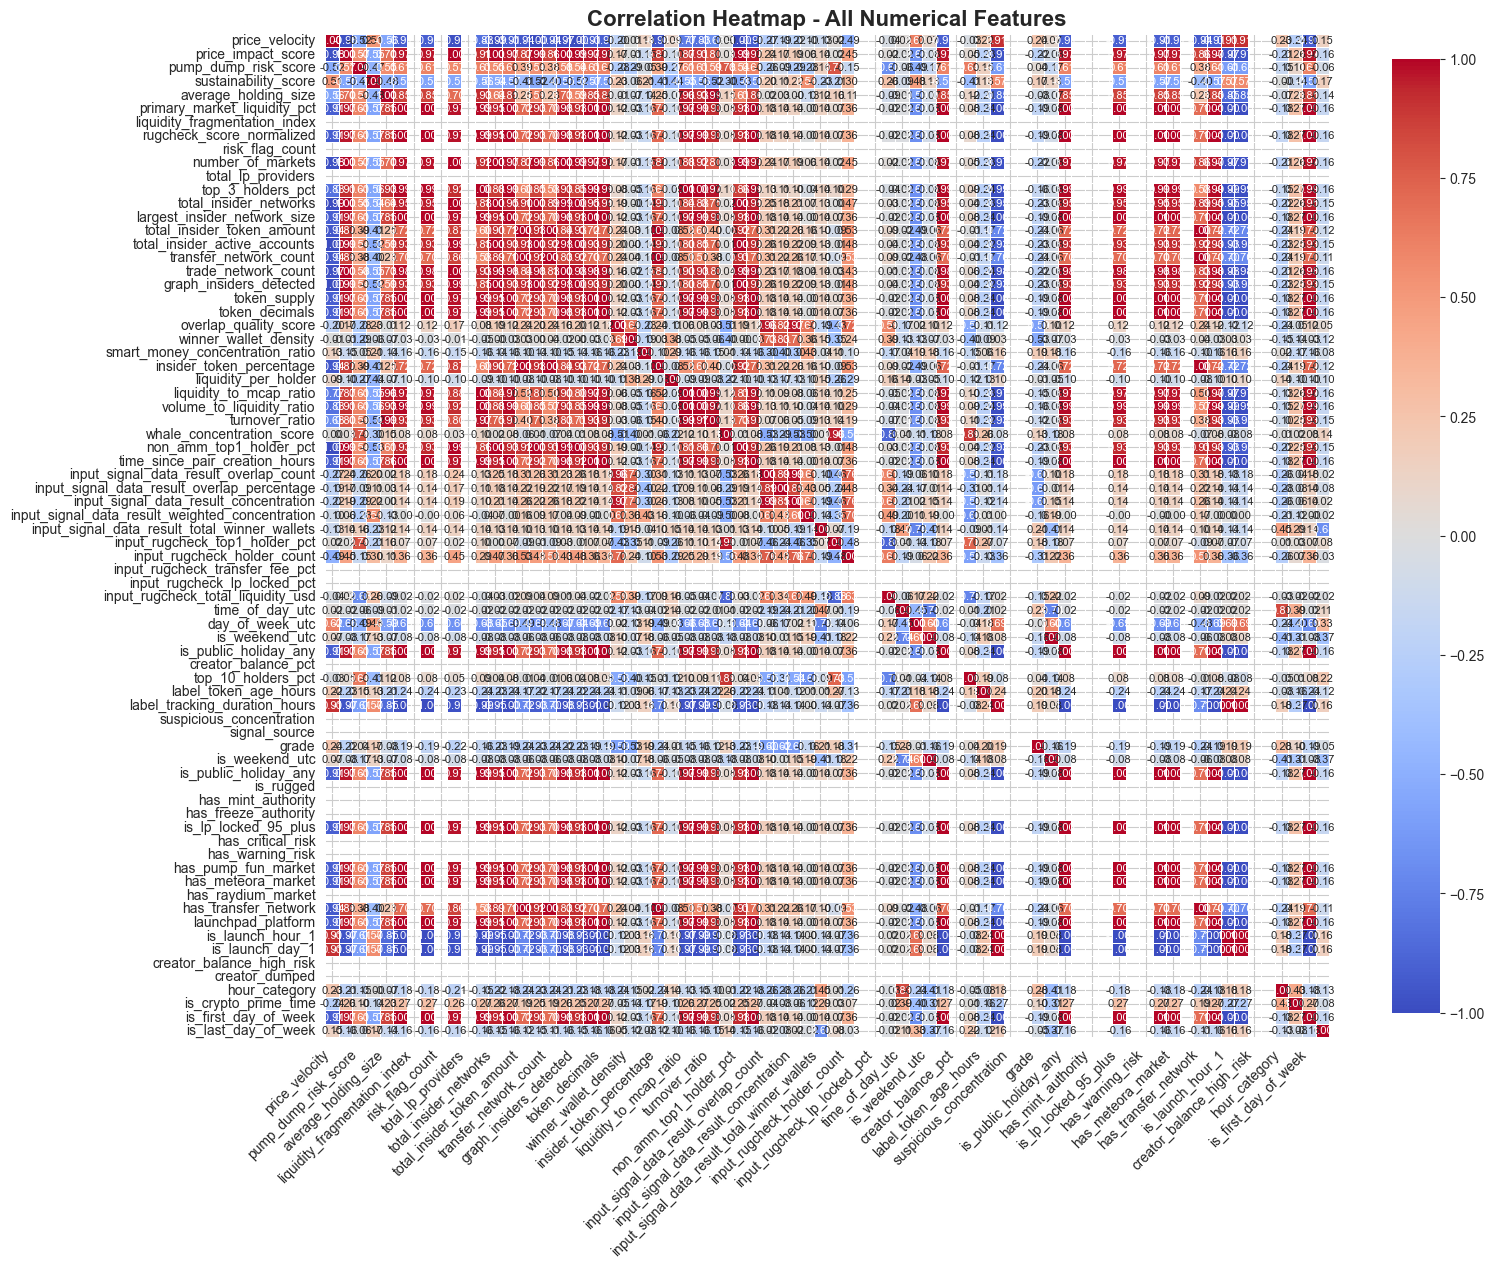


🔍 HIGH CORRELATION PAIRS (|r| > 0.9):

⚠️ WARNING: High correlations found!

price_velocity                 <-> price_impact_score            
   Correlation: -0.984
   ⚠️ Consider removing one of these features

price_velocity                 <-> primary_market_liquidity_pct  
   Correlation: -0.907
   ⚠️ Consider removing one of these features

price_velocity                 <-> rugcheck_score_normalized     
   Correlation: -0.907
   ⚠️ Consider removing one of these features

price_velocity                 <-> number_of_markets             
   Correlation: -0.983
   ⚠️ Consider removing one of these features

price_velocity                 <-> total_insider_networks        
   Correlation: -0.994
   ⚠️ Consider removing one of these features

price_velocity                 <-> largest_insider_network_size  
   Correlation: -0.907
   ⚠️ Consider removing one of these features

price_velocity                 <-> total_insider_token_amount    
   Correlation: -0.944
   ⚠️ Consider re

In [85]:
# Cell 12: Correlation Analysis - All Features

print("="*60)
print("🔥 CORRELATION ANALYSIS - ALL FEATURES")
print("="*60)

# Calculate correlation matrix
correlation_matrix = df_encoded[all_features].corr()

# Visualize with heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot_kws={'size': 8})
plt.title('Correlation Heatmap - All Numerical Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find high correlations (|r| > 0.9)
print("\n" + "="*60)
print("🔍 HIGH CORRELATION PAIRS (|r| > 0.9):")
print("="*60)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.9:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if high_corr_pairs:
    print("\n⚠️ WARNING: High correlations found!")
    for pair in high_corr_pairs:
        print(f"\n{pair['Feature 1']:30} <-> {pair['Feature 2']:30}")
        print(f"   Correlation: {pair['Correlation']:.3f}")
        print(f"   ⚠️ Consider removing one of these features")
else:
    print("\n✅ No high correlations (|r| > 0.9) found!")
    print("   All features are sufficiently independent.")

# Find moderate correlations (0.7 < |r| < 0.9)
print("\n" + "="*60)
print("📊 MODERATE CORRELATION PAIRS (0.7 < |r| < 0.9):")
print("="*60)

moderate_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.7 < abs(corr_value) <= 0.9:
            moderate_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if moderate_corr_pairs:
    print("\n⚠️ Moderate correlations found (acceptable but worth noting):")
    for pair in moderate_corr_pairs:
        print(f"\n{pair['Feature 1']:30} <-> {pair['Feature 2']:30}")
        print(f"   Correlation: {pair['Correlation']:.3f}")
else:
    print("\n✅ No moderate correlations (0.7 < |r| < 0.9) found!")

# Correlation with target
print("\n" + "="*60)
print("🎯 CORRELATION WITH TARGET VARIABLE:")
print("="*60)

target_correlations = df_encoded[all_features + ['target_encoded']].corr()['target_encoded'].drop('target_encoded').sort_values(ascending=False)

print("\nTop 10 Features Most Correlated with Target:")
print("-" * 60)
for feature, corr in target_correlations.head(10).items():
    print(f"{feature:40} | r = {corr:6.3f}")

print("\n💡 Interpretation:")
print("   - |r| > 0.5: Strong linear relationship with target")
print("   - 0.3 < |r| < 0.5: Moderate relationship")
print("   - |r| < 0.3: Weak linear relationship (but may still be useful)")

In [86]:
df_final = df_encoded.copy()

# Separate features (X) and target (y)
X = df_final.copy()
y = df_final['target_encoded'].copy()

print("\n📊 Dataset Summary:")
print("-" * 60)
print(f"Total samples: {len(X)}")
print(f"Number of features: {len(all_features)}")
print(f"Target variable: target_encoded (0=Loss, 1=Win)")


📊 Dataset Summary:
------------------------------------------------------------
Total samples: 57
Number of features: 74
Target variable: target_encoded (0=Loss, 1=Win)


In [87]:
# Check target distribution
print("\n🎯 Target Distribution:")
print("-" * 60)
print(y.value_counts().sort_index())
print(f"\nClass Balance: {y.value_counts()[0]} Bad : {y.value_counts()[1]} Good")
print(f"Percentage: {y.value_counts(normalize=True)[0]*100:.1f}% : {y.value_counts(normalize=True)[1]*100:.1f}%")
print("\n✅ Data is ready for machine learning modeling!")


🎯 Target Distribution:
------------------------------------------------------------
target_encoded
0    29
1    28
Name: count, dtype: int64

Class Balance: 29 Bad : 28 Good
Percentage: 50.9% : 49.1%

✅ Data is ready for machine learning modeling!


In [105]:
# Verify no missing values
print("\n" + "="*60)
print("🔍 DATA QUALITY CHECK:")
print("="*60)
print(f"\nMissing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum()}")


🔍 DATA QUALITY CHECK:

Missing values in X: 0
Missing values in y: 0


In [106]:

# Drop all non-encoded columns
df_encoded = df_encoded.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])

In [90]:
df_encoded.describe()

,input_signal_data_result_overlap_count,input_signal_data_result_overlap_percentage,input_signal_data_result_concentration,input_signal_data_result_weighted_concentration,input_signal_data_result_total_winner_wallets,input_signal_data_result_skip_reason,input_security_probation_reason,input_rugcheck_top1_holder_pct,input_rugcheck_holder_count,input_rugcheck_creator_balance,...,pump_dump_risk_score,sustainability_score,hour_category,is_crypto_prime_time,is_first_day_of_week,is_last_day_of_week,average_holding_size,primary_market_liquidity_pct,liquidity_fragmentation_index,target_encoded
count,57.000000,57.000000,57.000000,57.000000,57.000000,0.0,0.0,57.000000,57.000000,57.0,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,5.700000e+01,57.000000,57.0,57.000000
mean,30.438596,26.648246,0.277544,1.047719,11278.087719,NaN,NaN,17.992782,1440.473684,0.0,...,11.298246,82.105263,2.087719,0.333333,0.035088,0.421053,1.725385e+10,3.508772,0.0,0.491228
std,36.735064,19.249242,0.348560,0.722115,1170.602215,NaN,NaN,8.402276,915.504371,0.0,...,9.567364,4.113064,1.169260,0.475595,0.185637,0.498117,1.068322e+11,18.563715,0.0,0.504367
min,7.000000,6.610000,0.060000,0.040000,9233.000000,NaN,NaN,5.217916,139.000000,0.0,...,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000
25%,10.000000,16.130000,0.100000,0.120000,10347.000000,NaN,NaN,11.385060,780.000000,0.0,...,8.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000
50%,15.000000,20.430000,0.140000,1.330000,10347.000000,NaN,NaN,16.445349,1326.000000,0.0,...,8.000000,85.000000,3.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000
75%,25.000000,23.580000,0.240000,1.450000,12658.000000,NaN,NaN,23.975800,1676.000000,0.0,...,15.000000,85.000000,3.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.0,1.000000
max,138.000000,100.000000,1.330000,2.320000,12874.000000,NaN,NaN,34.488060,5049.000000,0.0,...,45.000000,85.000000,3.000000,1.000000,1.000000,1.000000,7.854159e+11,100.000000,0.0,1.000000


In [91]:
# Remove columns where all elements are NaN
df_encoded = df_encoded.dropna(axis=1, how='all')

print(f"✅ Removed columns with all NaN values")
print(f"Remaining columns: {df_encoded.shape[1]}")

✅ Removed columns with all NaN values
Remaining columns: 106


In [92]:
X = df_encoded.copy()

In [93]:
X.isnull().sum().sum()

np.int64(499)

In [94]:
X = X.fillna(X.mean())

In [95]:
if X.isnull().sum().sum() == 0 and y.isnull().sum() == 0:
    print("\n✅ No missing values - data is clean!")
else:
    print("\n⚠️ Missing values detected - will need to handle")



✅ No missing values - data is clean!


In [107]:
X.head()

,input_signal_data_result_overlap_count,input_signal_data_result_overlap_percentage,input_signal_data_result_concentration,input_signal_data_result_weighted_concentration,input_signal_data_result_total_winner_wallets,input_rugcheck_top1_holder_pct,input_rugcheck_holder_count,input_rugcheck_creator_balance,input_rugcheck_transfer_fee_pct,input_rugcheck_lp_locked_pct,...,pump_dump_risk_score,sustainability_score,hour_category,is_crypto_prime_time,is_first_day_of_week,is_last_day_of_week,average_holding_size,primary_market_liquidity_pct,liquidity_fragmentation_index,target_encoded
0,115,57.50,0.95,1.94,12128,12.267201,5049,0,0,100.0,...,38.0,70,0,1,1,0,1.980536e+11,100.0,0.0,1
1,14,22.95,0.12,0.13,12128,29.534123,1273,0,0,100.0,...,45.0,70,2,1,1,0,7.854159e+11,100.0,0.0,0
2,81,84.38,0.63,1.73,12874,22.635380,1698,0,0,100.0,...,15.0,85,1,0,0,0,0.000000e+00,0.0,0.0,1
3,8,6.61,0.06,1.23,12658,8.539194,139,0,0,100.0,...,0.0,70,3,0,0,0,0.000000e+00,0.0,0.0,1
4,14,14.58,0.11,1.26,12658,15.519079,1318,0,0,100.0,...,8.0,85,3,1,0,0,0.000000e+00,0.0,0.0,0


In [97]:
from sklearn.model_selection import train_test_split

print("="*60)
print("✂️ TRAIN-TEST SPLIT")
print("="*60)

# Split: 80% train+val, 20% test
# Using stratify to maintain class balance
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for test 
    random_state=42,    # For reproducibility
    stratify=y          
)

✂️ TRAIN-TEST SPLIT


In [98]:
print("\n📊 Split Summary:")
print("-" * 60)
print(f"Total samples: {len(X)}")
print(f"Training + Validation: {len(X_train_val)} ({len(X_train_val)/len(X)*100:.1f}%)")
print(f"Test (held-out): {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")


📊 Split Summary:
------------------------------------------------------------
Total samples: 57
Training + Validation: 45 (78.9%)
Test (held-out): 12 (21.1%)


In [99]:
# Show shapes
print("\n" + "="*60)
print("📐 DATA SHAPES:")
print("="*60)
print(f"X_train_val: {X_train_val.shape}")
print(f"y_train_val: {y_train_val.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


📐 DATA SHAPES:
X_train_val: (45, 106)
y_train_val: (45,)
X_test: (12, 106)
y_test: (12,)


In [100]:
# Cell 16: Feature Scaling

from sklearn.preprocessing import StandardScaler

print("="*60)
print("⚖️ FEATURE SCALING")
print("="*60)

# Identify which features to scale
# We'll scale ALL features (numerical + encoded categorical work with StandardScaler)
features_to_scale = X.columns.tolist()

print(f"\n📊 Features to scale: {len(features_to_scale)}")
print("Features:")
for feature in features_to_scale:
    print(f"   - {feature}")

# Initialize StandardScaler
scaler = StandardScaler()

print("\n" + "="*60)
print("🔧 FITTING SCALER:")
print("="*60)
print("Fitting on Training+Validation set only...")


⚖️ FEATURE SCALING

📊 Features to scale: 106
Features:
   - input_signal_data_result_overlap_count
   - input_signal_data_result_overlap_percentage
   - input_signal_data_result_concentration
   - input_signal_data_result_weighted_concentration
   - input_signal_data_result_total_winner_wallets
   - input_rugcheck_top1_holder_pct
   - input_rugcheck_holder_count
   - input_rugcheck_creator_balance
   - input_rugcheck_transfer_fee_pct
   - input_rugcheck_lp_locked_pct
   - input_rugcheck_total_liquidity_usd
   - input_dexscreener_current_price_usd
   - signal_source
   - grade
   - checked_at_timestamp
   - time_of_day_utc
   - day_of_week_utc
   - is_weekend_utc
   - is_public_holiday_any
   - price_usd
   - fdv_usd
   - liquidity_usd
   - volume_h24_usd
   - price_change_h24_pct
   - pair_created_at_timestamp
   - is_rugged
   - has_mint_authority
   - has_freeze_authority
   - creator_balance_pct
   - top_10_holders_pct
   - is_lp_locked_95_plus
   - total_lp_locked_usd
   - token_ag

In [109]:
# Fit scaler on training+validation data ONLY
scaler.fit(X_train_val)

print("✅ Scaler fitted!")

✅ Scaler fitted!


In [102]:
# Show scaling parameters learned
print("\n📊 Scaling Parameters (Mean and Std from Train+Val):")
scaling_params = pd.DataFrame({
    'Feature': features_to_scale,
    'Mean': scaler.mean_,
    'Std': scaler.scale_
})
print(scaling_params.to_string(index=False))



📊 Scaling Parameters (Mean and Std from Train+Val):
                                        Feature          Mean          Std
         input_signal_data_result_overlap_count  2.866667e+01 3.416301e+01
    input_signal_data_result_overlap_percentage  2.614400e+01 1.917904e+01
         input_signal_data_result_concentration  2.577778e-01 3.199020e-01
input_signal_data_result_weighted_concentration  1.015111e+00 6.799922e-01
  input_signal_data_result_total_winner_wallets  1.137587e+04 1.178365e+03
                 input_rugcheck_top1_holder_pct  1.803844e+01 7.727760e+00
                    input_rugcheck_holder_count  1.390689e+03 8.960791e+02
                 input_rugcheck_creator_balance  0.000000e+00 1.000000e+00
                input_rugcheck_transfer_fee_pct  0.000000e+00 1.000000e+00
                   input_rugcheck_lp_locked_pct  1.000000e+02 1.000000e+00
             input_rugcheck_total_liquidity_usd  4.636625e+04 2.665880e+04
            input_dexscreener_current_price_usd

In [103]:

# Transform both training and test sets
print("\n" + "="*60)
print("🔄 TRANSFORMING DATA:")
print("="*60)

X_train_val_scaled = scaler.transform(X_train_val)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Training+Validation set scaled: {X_train_val_scaled.shape}")
print(f"✅ Test set scaled: {X_test_scaled.shape}")


🔄 TRANSFORMING DATA:
✅ Training+Validation set scaled: (45, 106)
✅ Test set scaled: (12, 106)


In [ ]:

# Convert back to DataFrames
X_train_val_scaled = pd.DataFrame(X_train_val_scaled, columns=features_to_scale, index=X_train_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_to_scale, index=X_test.index)

In [113]:
# Baseline Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

In [114]:
# Initialize baseline model
baseline_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='lbfgs'  # Good default solver
)

In [122]:
# Setup 10-Fold Stratified Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [123]:
cv_scores = cross_val_score(
    baseline_model, 
    X_train_val_scaled, 
    y_train_val, 
    cv=cv, 
    scoring='accuracy',
    n_jobs=-1  # Use all CPU cores
)

In [117]:
print("\n📊 Cross-Validation Results:")
print("-" * 60)
for fold, score in enumerate(cv_scores, 1):
    print(f"Fold {fold}: {score:.4f} ({score*100:.2f}%)")


📊 Cross-Validation Results:
------------------------------------------------------------
Fold 1: 1.0000 (100.00%)
Fold 2: 1.0000 (100.00%)
Fold 3: 1.0000 (100.00%)
Fold 4: 1.0000 (100.00%)
Fold 5: 1.0000 (100.00%)
Fold 6: 1.0000 (100.00%)
Fold 7: 1.0000 (100.00%)
Fold 8: 0.7500 (75.00%)
Fold 9: 1.0000 (100.00%)
Fold 10: 1.0000 (100.00%)


In [126]:
# Train model on ALL training+validation data
print("\n📊 Training final model on all train+val samples...")
baseline_model.fit(X_train_val_scaled, y_train_val)
print("✅ Model trained!")


📊 Training final model on all train+val samples...
✅ Model trained!


In [125]:
# Get training accuracy
train_accuracy = baseline_model.score(X_train_val_scaled, y_train_val)
print(f"\n📈 Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")


📈 Training Accuracy: 1.0000 (100.00%)


In [128]:
# Evaluate on test set (FIRST TIME touching test data!)
print("\n🔒 Evaluating on TEST SET (400 samples)...")
test_accuracy = baseline_model.score(X_test_scaled, y_test)
print(f"📈 Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Calculate gap
gap = abs(train_accuracy - test_accuracy)
print(f"\n📊 Train-Test Gap: {gap:.4f} ({gap*100:.2f}%)")


🔒 Evaluating on TEST SET (400 samples)...
📈 Test Accuracy: 1.0000 (100.00%)

📊 Train-Test Gap: 0.0000 (0.00%)


In [130]:


final_features = X.columns.tolist()
coefficients = baseline_model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)


In [ ]:
# Cell 20: Detailed Performance Metrics - Tuned Model

from sklearn.metrics import (
    confusion_matrix, classification_report, 
    roc_curve, roc_auc_score, ConfusionMatrixDisplay
)

print("="*60)
print("📊 DETAILED PERFORMANCE METRICS - TUNED MODEL")
print("="*60)

# Get predictions
y_train_pred = best_model.predict(X_train_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Get probability predictions for ROC
y_train_proba = best_model.predict_proba(X_train_val_scaled)[:, 1]
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# ============================================
# CONFUSION MATRIX
# ============================================
print("\n" + "="*60)
print("📋 CONFUSION MATRIX:")
print("="*60)

# Training set
cm_train = confusion_matrix(y_train_val, y_train_pred)
print("\nTraining Set:")
print(cm_train)

# Test set
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nTest Set:")
print(cm_test)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, 
                                     display_labels=['Bad Trader', 'Good Trader'])
disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Training Set Confusion Matrix', fontsize=12, fontweight='bold')
axes[0].grid(False)

# Test confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                    display_labels=['Bad Trader', 'Good Trader'])
disp_test.plot(ax=axes[1], cmap='Greens', values_format='d')
axes[1].set_title('Test Set Confusion Matrix', fontsize=12, fontweight='bold')
axes[1].grid(False)

plt.tight_layout()
plt.show()

# ============================================
# CLASSIFICATION REPORT
# ============================================
print("\n" + "="*60)
print("📊 CLASSIFICATION REPORT:")
print("="*60)

print("\nTraining Set:")
print(classification_report(y_train_val, y_train_pred, 
                           target_names=['Bad Trader', 'Good Trader'],
                           digits=4))

print("\nTest Set:")
print(classification_report(y_test, y_test_pred,
                           target_names=['Bad Trader', 'Good Trader'],
                           digits=4))

# ============================================
# ROC CURVE AND AUC
# ============================================
print("\n" + "="*60)
print("📈 ROC CURVE AND AUC SCORE:")
print("="*60)

# Calculate ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train_val, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calculate AUC scores
auc_train = roc_auc_score(y_train_val, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

print(f"\nTraining AUC: {auc_train:.4f}")
print(f"Test AUC:     {auc_test:.4f}")

# Plot ROC curves
plt.figure(figsize=(10, 8))

plt.plot(fpr_train, tpr_train, linewidth=2, 
         label=f'Training (AUC = {auc_train:.4f})', color='blue')
plt.plot(fpr_test, tpr_test, linewidth=2,
         label=f'Test (AUC = {auc_test:.4f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Tuned Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================
# PREDICTION ANALYSIS
# ============================================
print("\n" + "="*60)
print("🔍 PREDICTION ANALYSIS:")
print("="*60)

# Find misclassified examples
test_misclassified_idx = X_test_scaled.index[y_test != y_test_pred]

if len(test_misclassified_idx) > 0:
    print(f"\n❌ Misclassified Test Samples: {len(test_misclassified_idx)}")
    print("\nDetails of misclassified samples:")
    print("-" * 80)
    
    for idx in test_misclassified_idx:
        actual = "Good Trader" if y_test.loc[idx] == 1 else "Bad Trader"
        predicted = "Good Trader" if y_test_pred[X_test_scaled.index.get_loc(idx)] == 1 else "Bad Trader"
        prob = y_test_proba[X_test_scaled.index.get_loc(idx)]
        
        print(f"\nSample Index: {idx}")
        print(f"  Actual:    {actual}")
        print(f"  Predicted: {predicted}")
        print(f"  Probability (Good): {prob:.4f}")
        print(f"  Features:")
        
        # Show original (unscaled) features
        original_features = df_final.loc[idx, final_features]
        for feature, value in original_features.items():
            print(f"    {feature:45} = {value}")
else:
    print("\n✅ Perfect classification - No misclassified samples!")

# ============================================
# SUMMARY
# ============================================
print("\n" + "="*60)
print("✅ DETAILED EVALUATION COMPLETE!")
print("="*60)
print(f"\n🎯 Model: Logistic Regression (L1, C=0.01)")
print(f"📊 Features Used: 3 categorical (5 numerical eliminated)")
print(f"📊 Training Accuracy: {best_model.score(X_train_val_scaled, y_train_val):.4f}")
print(f"📊 Test Accuracy: {test_accuracy_tuned:.4f}")
print(f"📊 Test AUC: {auc_test:.4f}")
print(f"📊 Misclassified: {len(test_misclassified_idx)} / 400")